# Imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

# Part 5: Eigenfaces

### Training Images

Training: Compute a reasonable number of eigenfaces from the training
dataset. Display first 5 eigenfaces. Find eigen representations of the
training images by projecting them onto the computed eigenfaces. Store
these representations.

In [2]:
#empty arrays for storing our images per person

sarah = []
graysarah = []

quentin = []
grayquentin = []

julien = []
grayjulien = []

connor = []
grayconnor = []

bogdan = []
graybogdan = []

#x,y,h,w for test images to isolate faces

sarah_list = [[113, 103, 29, 29], [107, 95, 30, 30], [114, 95, 29, 29], [97, 101, 29, 29], [105, 104, 20, 32], [96, 81, 54, 54], [104, 84, 51, 51], [116, 90, 38, 44], [81, 88, 50, 50], [83, 90, 28, 40], [68, 83, 89, 89], [77, 80, 84, 84], [93, 91, 70, 80], [74, 94, 77, 77], [58, 86, 70, 102]] 

quentin_list = [[98, 70, 51, 51], [100, 71, 36, 43], [90, 75, 35, 50], [122, 73, 30, 48], [125, 75, 35, 50], [98, 60, 67, 75], [80, 62, 55, 73], [80, 55, 47, 78], [100, 75, 50, 68], [98, 62, 51, 90], [55, 70, 120, 133], [80, 72, 85, 125], [70, 90, 80, 120], [60, 67, 90, 127], [97, 54, 88, 156]]

julien_list = [[94, 79, 51, 51], [112, 89, 37, 43], [110, 90, 35, 60], [120, 85, 40, 50], [110, 90, 45, 50], [95, 87, 59, 70], [108, 80, 50, 75], [100, 77, 50, 77], [95, 75, 50, 75], [110, 75, 50, 75], [75, 75, 95, 120], [90, 75, 90, 125], [75, 75, 100, 125], [77, 56, 127, 140], [100, 75, 80, 125]]

connor_list = [[112, 94, 46, 46], [103, 98, 45, 45], [103, 103, 38, 47], [109, 96, 39, 49], [115, 104, 30, 47], [92, 80, 60, 65], [100, 77, 45, 67], [70, 83, 51, 67], [100, 80, 50, 70], [106, 81, 44, 69], [80, 60, 105, 122], [70, 63, 105, 125], [50, 80, 80, 120], [98, 75, 80, 118], [112, 59, 75, 131]]

bogdan_list = [[100, 105, 57, 57], [120, 111, 27, 42], [128, 106, 35, 44], [95, 102, 38, 46], [89, 105, 36, 50], [95, 96, 62, 62], [124, 104, 47, 65], [131, 99, 52, 67], [91, 87, 65, 80], [76, 91, 60, 75], [68, 72, 133, 140], [89, 80, 100, 125], [107, 78, 80, 130], [45, 84, 115, 120], [60, 89, 102, 110]]



In [3]:
#Quentin
q_files = sorted(glob.glob ("./CroppedIMGs/Train/Quentin/IMG_*.jpg"))
for myFile in q_files:
    myface = cv2.imread(myFile)
    myface = cv2.resize(myface,(256,256))
    gray = cv2.cvtColor(myface, cv2.COLOR_BGR2GRAY)
    quentin.append(myface)
    grayquentin.append(gray)
    
#Connor
c_files = sorted(glob.glob ("./CroppedIMGs/Train/Connor/IMG_*.jpg"))
for myFile in c_files:
    myface = cv2.imread(myFile)
    myface = cv2.resize(myface,(256,256))
    gray = cv2.cvtColor(myface, cv2.COLOR_BGR2GRAY)
    connor.append(myface)
    grayconnor.append(gray)

#Bogdan
b_files = sorted(glob.glob ("./CroppedIMGs/Train/Bogdan/IMG_*.jpg"))
for myFile in b_files:
    myface = cv2.imread(myFile)
    myface = cv2.resize(myface,(256,256))
    gray = cv2.cvtColor(myface, cv2.COLOR_BGR2GRAY)
    bogdan.append(myface)
    graybogdan.append(gray)
    
#Julien 
j_files = sorted(glob.glob ("./CroppedIMGs/Train/Julien/IMG_*.jpg"))
for myFile in j_files:
    myface = cv2.imread(myFile)
    myface = cv2.resize(myface,(256,256))
    gray = cv2.cvtColor(myface, cv2.COLOR_BGR2GRAY)
    julien.append(myface)
    grayjulien.append(gray)
    
#Sarah
s_files = sorted(glob.glob ("./CroppedIMGs/Train/Sarah/IMG_*.jpg"))
for myFile in s_files:
    myface = cv2.imread(myFile)
    myface = cv2.resize(myface,(256,256))
    gray = cv2.cvtColor(myface, cv2.COLOR_BGR2GRAY)
    sarah.append(myface)
    graysarah.append(gray)
    
#Ordering: quentin, connor, bodgan, julien, sarah

In [4]:
#resize img's to improve computation speed
SIZE = (100, 100) 

# face extraction from images 
quentin_face = []
connor_face = []
bogdan_face = []
julien_face = []
sarah_face = []

#Quentin's face cropped

for i in range(len(grayquentin)):
    [x, y, w, h] = quentin_list[i]
    quentin_face.append(grayquentin[i][y:y+h, x:x+w])
    #plt.imshow(quentin_face[i], "gray")
    #plt.show()
    
#Connor's face cropped

for i in range(len(grayconnor)):
    [x, y, w, h] = connor_list[i]
    connor_face.append(grayconnor[i][y:y+h, x:x+w])     
    #plt.imshow(connor_face[i], "gray")
    #plt.show()
    
#Bogdan's face cropped

for i in range(len(graybogdan)):
    [x, y, w, h] = bogdan_list[i]
    bogdan_face.append(graybogdan[i][y:y+h, x:x+w])  
    #plt.imshow(bogdan_face[i], "gray")
    #plt.show()
    
#Julien's face cropped

for i in range(len(grayjulien)):
    [x, y, w, h] = julien_list[i]
    julien_face.append(grayjulien[i][y:y+h, x:x+w])  
    #plt.imshow(julien_face[i], "gray")
    #plt.show()
    
#Sarah's face cropped

for i in range(len(graysarah)):
    [x, y, w, h] = sarah_list[i]
    sarah_face.append(graysarah[i][y:y+h, x:x+w])  
    #plt.imshow(sarah_face[i], "gray")
    #plt.show()

In [5]:
# resized faces post extraction to increase computation speed 
quentin_rs = []
connor_rs = []
bogdan_rs = []
julien_rs = []
sarah_rs = []

In [6]:
for i in range(len(quentin_face)):
    name = quentin_face[i]
    img = cv2.resize(name, SIZE)
    quentin_rs.append(img)
    #plt.imshow(quentin_rs[i], "gray")
    #plt.show()
    
for i in range(len(connor_face)):
    name = connor_face[i]
    img = cv2.resize(name, SIZE)
    connor_rs.append(img)
    #plt.imshow(connor_rs[i], "gray")
    #plt.show()
    
for i in range(len(bogdan_face)):
    name = bogdan_face[i]
    img = cv2.resize(name, SIZE)
    bogdan_rs.append(img)
    #plt.imshow(bogdan_rs[i], "gray")
    #plt.show()
    
for i in range(len(julien_face)):
    name = julien_face[i]
    img = cv2.resize(name, SIZE)
    julien_rs.append(img)
    #plt.imshow(julien_rs[i], "gray")
    #plt.show()
    
for i in range(len(sarah_face)):
    name = sarah_face[i]
    img = cv2.resize(name, SIZE)
    sarah_rs.append(img)
    #plt.imshow(sarah_rs[i], "gray")
    #plt.show()

In [7]:
#create the vector intensity representation by flattening images of each individual 

quentin_flat = [v.flatten() for v in quentin_rs]
connor_flat = [v.flatten() for v in connor_rs]
bogdan_flat = [v.flatten() for v in bogdan_rs]
julien_flat = [v.flatten() for v in julien_rs]
sarah_flat = [v.flatten() for v in sarah_rs]

X_train = np.array([*quentin_flat, *connor_flat, *bogdan_flat, *julien_flat, *sarah_flat]) #our eigenface_train data 

#0 will match up with Quentin, 1 for Connor, 2 for Bogdan, 3 for Julien and 4 for Sarah
Y_train = np.concatenate(([0 for x in range(15)], [1 for x in range(15)], [2 for x in range(15)], [3 for x in range(15)], [4 for x in range(15)]))

In [8]:
#Run PCA with optimized component number
component_number = 70 # optimized - check report for further details

pca = PCA(n_components=component_number)
pca.fit(X_train)

X_train = pca.transform(X_train)

eigenvectors = pca.components_
variances = pca.explained_variance_
variance_ratios = pca.explained_variance_ratio_

np.sum(variance_ratios[0:70])


0.9978434984715275

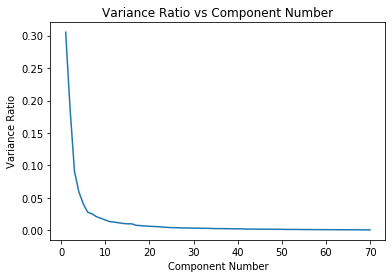

In [9]:
#display of variance ratio vs component number
#not required, but interesting to see
plt.title('Variance Ratio vs Component Number')
plt.plot(range(1, 71), variance_ratios)
plt.xlabel('Component Number'), plt.ylabel('Variance Ratio')
plt.show()

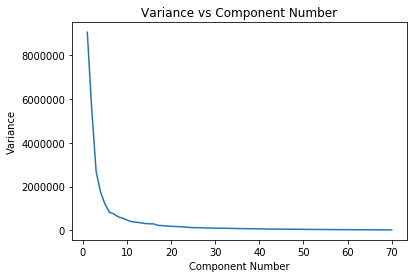

In [10]:
#display of variance vs component number
#not required, but interesting to see
plt.title('Variance vs Component Number')
plt.plot(range(1, 71), variances)
plt.xlabel('Component Number'), plt.ylabel('Variance')
plt.show()

(Text(0.5, 1.0, 'Mean Face from Training Dataset'), (-0.5, 99.5, 99.5, -0.5))

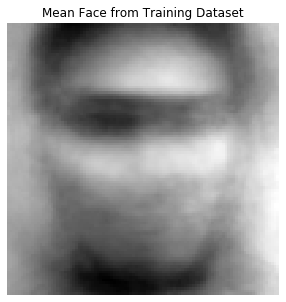

In [11]:
#creation of mean eigenface
# calculate the mean of the data and display the mean face
mean = pca.mean_
meanface = mean.reshape(SIZE)

plt.figure(figsize=(5,5))
plt.imshow(meanface, cmap='gray')
plt.title('Mean Face from Training Dataset'), plt.axis('off')
                        

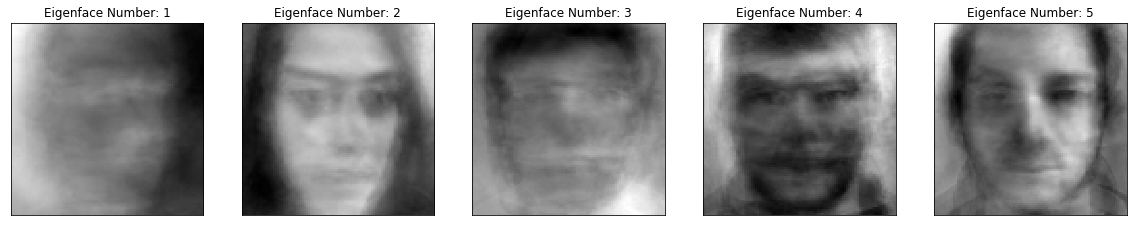

In [12]:
#Display of first 5 Eigenfaces 

temp_ev = eigenvectors.reshape((component_number, 100, 100))
eigenfaces = []

for i in range(component_number):
    eigenfaces.append(temp_ev[i])

fig = plt.figure(figsize=(20, 20))
for i in range(5):
    ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(eigenfaces[i], cmap='gray')
    plt.title('Eigenface Number: {}'.format(i+1))



(Text(0.5, 1.0, 'Mean Eigenface from Training Dataset'),
 (-0.5, 99.5, 99.5, -0.5))

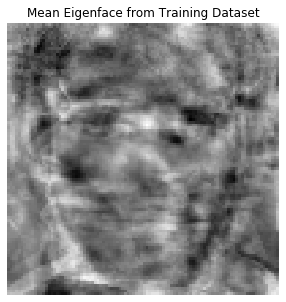

In [13]:
#display of all eigenfaces together

eg_output = 0

for vector in eigenvectors:
    eigenface = vector.reshape(SIZE)
    eigenfaces.append(eigenface)
    eg_output += eigenface
    
plt.figure(figsize=(5,5))
plt.imshow(eg_output, cmap='gray')
plt.title('Mean Eigenface from Training Dataset'), plt.axis('off')
        

### Testing Images

In [14]:
sarah_test = []
graysarah_test = []

quentin_test = []
grayquentin_test = []

julien_test = []
grayjulien_test = []

connor_test = []
grayconnor_test = []

bogdan_test = []
graybogdan_test = []

#x,y,h,w for test images to isolate faces
bogdan_list_test = [[96, 111,  60,  58], [80, 112,  60,  60], [55, 110,  58,  55], [130,  100,  63,  65], [137,  105,  50,  73], [115, 70,  53,  88], [105, 70,  53,  93], [70,  76, 78,  80], [71,  80,  63,  78], [55,  80,  63,  78], [88,  82,  70,  73], [92,  82,  70,  70], [90,  80,  70,  70], [97,  81,  64,  64]]
quentin_list_test = [[98, 84, 46, 46], [45, 75, 50, 68], [50, 75, 50, 60], [130, 77, 60, 60], [130, 77, 50, 60], [84, 58, 51, 51],  [72, 60, 55, 58], [68, 56, 52, 58], [96, 56, 47, 60], [120, 60, 45, 64], [91, 66, 57, 57], [98, 71, 56, 62], [95, 86, 58, 58], [101, 86, 60, 62]]
sarah_list_test = [[113, 101, 45, 45], [119,  98,  40,  46], [120, 105,  30,  45], [97, 105,  36,  40], [91, 100,  26,  40], [109,  79,  48,  48], [120,  77,  45,  49], [122,  74,  40,  55], [95,  78, 35,  49], [93,  78, 30,  49], [101,  79,  47,  47], [105,  80,  40,  47], [85,  78,  49,  49], [113,  77,  46,  46]]
connor_list_test = [[110,  98,  51,  46], [90,  95,  51,  46], [85,  85,  51,  48], [120,  95,  51,  46], [140,  95,  47,  46], [120,  60,  52,  55], [110,  60,  51,  46], [94, 56, 50, 50], [110,  53,  46,  56], [107,  51,  51,  54], [106,  66,  51,  53], [108,  68,  50,  50], [104,  74,  37,  37], [106,  73,  44,  44]]
julien_list_test = [[130,  85,  45,  55], [128,  91,  45,  45], [115,  96,  49,  49], [110,  96,  49,  49], [103,  85,  49,  49], [110, 70, 48, 58], [109, 70, 48, 48], [93, 60, 62, 62], [93, 60, 54, 62], [100, 65, 50, 58], [94, 76, 54, 54], [95, 70, 55, 55], [111,  79,  49,  49], [98, 73, 59, 59]]

#Quentin
q_files_test = sorted(glob.glob ("./CroppedIMGs/Test/Quentin/IMG_*.jpg"))
for myFile in q_files_test:
    myface = cv2.imread(myFile)
    myface = cv2.resize(myface,(256,256))
    gray = cv2.cvtColor(myface, cv2.COLOR_BGR2GRAY)
    quentin_test.append(myface)
    grayquentin_test.append(gray)
    
#Connor
c_files_test = sorted(glob.glob ("./CroppedIMGs/Test/Connor/IMG_*.jpg"))
for myFile in c_files_test:
    myface = cv2.imread(myFile)
    myface = cv2.resize(myface,(256,256))
    gray = cv2.cvtColor(myface, cv2.COLOR_BGR2GRAY)
    connor_test.append(myface)
    grayconnor_test.append(gray)

#Bogdan
b_files_test = sorted(glob.glob ("./CroppedIMGs/Test/Bogdan/IMG_*.jpg"))
for myFile in b_files_test:
    myface = cv2.imread(myFile)
    myface = cv2.resize(myface,(256,256))
    gray = cv2.cvtColor(myface, cv2.COLOR_BGR2GRAY)
    bogdan_test.append(myface)
    graybogdan_test.append(gray)
    
#Julien 
j_files_test = sorted(glob.glob ("./CroppedIMGs/Test/Julien/IMG_*.jpg"))
for myFile in j_files_test:
    myface = cv2.imread(myFile)
    myface = cv2.resize(myface,(256,256))
    gray = cv2.cvtColor(myface, cv2.COLOR_BGR2GRAY)
    julien_test.append(myface)
    grayjulien_test.append(gray)
    
#Sarah
s_files_test = sorted(glob.glob ("./CroppedIMGs/Test/Sarah/IMG_*.jpg"))
for myFile in s_files_test:
    myface = cv2.imread(myFile)
    myface = cv2.resize(myface,(256,256))
    gray = cv2.cvtColor(myface, cv2.COLOR_BGR2GRAY)
    sarah_test.append(myface)
    graysarah_test.append(gray)
    


In [15]:
#face extraction from images 
quentin_face_test = []
connor_face_test = []
bogdan_face_test = []
julien_face_test = []
sarah_face_test = []

# the following code crops our images to only show the specific outline of the face

#Quentin's face cropped

for i in range(len(grayquentin_test)):
    [x, y, w, h] = quentin_list_test[i]
    quentin_face_test.append(grayquentin_test[i][y:y+h, x:x+w])
    #plt.imshow(quentin_face_test[i], "gray")
    #plt.show()
    
#Connor's face cropped

for i in range(len(grayconnor_test)):
    [x, y, w, h] = connor_list_test[i]
    connor_face_test.append(grayconnor_test[i][y:y+h, x:x+w])     
    #plt.imshow(connor_face_test[i], "gray")
    #plt.show()
    
#Bogdan's face cropped

for i in range(len(graybogdan_test)):
    [x, y, w, h] = bogdan_list_test[i]
    bogdan_face_test.append(graybogdan_test[i][y:y+h, x:x+w])  
    #plt.imshow(bogdan_face_test[i], "gray")
    #plt.show()
    
#Julien's face cropped

for i in range(len(grayjulien_test)):
    [x, y, w, h] = julien_list_test[i]
    julien_face_test.append(grayjulien_test[i][y:y+h, x:x+w])  
    #plt.imshow(julien_face_test[i], "gray")
    #plt.show()
    
#Sarah's face cropped

for i in range(len(graysarah_test)):
    [x, y, w, h] = sarah_list_test[i]
    sarah_face_test.append(graysarah_test[i][y:y+h, x:x+w])  
    #plt.imshow(sarah_face_test[i], "gray")
    #plt.show()

In [16]:
# resized faces post extraction to increase computation speed 
quentin_rs_test = []
connor_rs_test = []
bogdan_rs_test = []
julien_rs_test = []
sarah_rs_test = []

#resize faces to 100x100 to increase computation speed 

for i in range(len(quentin_face_test)):
    name = quentin_face_test[i]
    img = cv2.resize(name, SIZE)
    quentin_rs_test.append(img)
    #plt.imshow(quentin_rs_test[i], "gray")
    #plt.show()
    
for i in range(len(connor_face_test)):
    name = connor_face_test[i]
    img = cv2.resize(name, SIZE)
    connor_rs_test.append(img)
    #plt.imshow(connor_rs_test[i], "gray")
    #plt.show()
    
for i in range(len(bogdan_face_test)):
    name = bogdan_face_test[i]
    img = cv2.resize(name, SIZE)
    bogdan_rs_test.append(img)
    #plt.imshow(bogdan_rs_test[i], "gray")
    #plt.show()
    
for i in range(len(julien_face_test)):
    name = julien_face_test[i]
    img = cv2.resize(name, SIZE)
    julien_rs_test.append(img)
    #plt.imshow(julien_rs_test[i], "gray")
    #plt.show()
    
for i in range(len(sarah_face_test)):
    name = sarah_face_test[i]
    img = cv2.resize(name, SIZE)
    sarah_rs_test.append(img)
    #plt.imshow(sarah_rs_test[i], "gray")
    #plt.show()

In [17]:
#create the vector intensity representation by flattening images of each individual 

quentin_flat_test = [v.flatten() for v in quentin_rs_test]
connor_flat_test = [v.flatten() for v in connor_rs_test]
bogdan_flat_test = [v.flatten() for v in bogdan_rs_test]
julien_flat_test = [v.flatten() for v in julien_rs_test]
sarah_flat_test = [v.flatten() for v in sarah_rs_test]

X_test = np.array([*quentin_flat_test, *connor_flat_test, *bogdan_flat_test, *julien_flat_test, *sarah_flat_test]) #our eigenface_test data 

Y_test = np.concatenate(([0 for x in range(14)], [1 for x in range(14)], [2 for x in range(14)], [3 for x in range(14)], [4 for x in range(14)]))

#apply PCA transformation to our test images
X_test = pca.transform(X_test)

**Recognition Rate**: number of correct recognitions/total number of images


**Confusion Matrix:** number of images where person i is recognised as person j/total number of images of person i

In [18]:
#arrays to hold number of predictions and the number of correct predictions to calculate Recognition Rate 
corr_count = []
prediction_list = []

#0 is for Quentin, 1 is for Connor, 2 is for Bogdan, 3 is for Julien and 4 represents Sarah
label_names = {0:'Quentin', 1:'Connor', 2:'Bogdan', 3:'Julien', 4: 'Sarah'}

for i, value in enumerate(X_test): 
    
    # find the nearest neighbor (of eigenfaces) from our training set images
    nearest_neighbor = np.argmin(np.linalg.norm(X_test[i] - X_train, axis=1)) 
    
    # Print predicted values vs Y-test real values values, and then increment our array for predictions + number of correct predictions
    print('Prediction = {}\t | \tReal Value = {}'.format(label_names[Y_train[nearest_neighbor]], label_names[Y_test[i]]))
    prediction_list.append(Y_train[nearest_neighbor])
    corr_count.append(label_names[Y_train[nearest_neighbor]] == label_names[Y_test[i]])
    
#Recogition Rate: number of correct recognitions/total number of images
print('\nRecognition Rate Accuracy = {}'.format(sum(corr_count)/len(X_test)*100))

Prediction = Bogdan	 | 	Real Value = Quentin
Prediction = Julien	 | 	Real Value = Quentin
Prediction = Julien	 | 	Real Value = Quentin
Prediction = Connor	 | 	Real Value = Quentin
Prediction = Connor	 | 	Real Value = Quentin
Prediction = Quentin	 | 	Real Value = Quentin
Prediction = Quentin	 | 	Real Value = Quentin
Prediction = Quentin	 | 	Real Value = Quentin
Prediction = Quentin	 | 	Real Value = Quentin
Prediction = Quentin	 | 	Real Value = Quentin
Prediction = Quentin	 | 	Real Value = Quentin
Prediction = Quentin	 | 	Real Value = Quentin
Prediction = Quentin	 | 	Real Value = Quentin
Prediction = Quentin	 | 	Real Value = Quentin
Prediction = Julien	 | 	Real Value = Connor
Prediction = Julien	 | 	Real Value = Connor
Prediction = Julien	 | 	Real Value = Connor
Prediction = Connor	 | 	Real Value = Connor
Prediction = Connor	 | 	Real Value = Connor
Prediction = Quentin	 | 	Real Value = Connor
Prediction = Connor	 | 	Real Value = Connor
Prediction = Connor	 | 	Real Value = Connor
Predicti

Text(0.5, 1.0, 'Confusion Matrix with 70 Components')

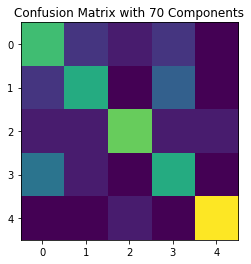

In [19]:
plt.imshow(confusion_matrix(Y_test, prediction_list))
plt.title('Confusion Matrix with 70 Components')

In [20]:
print("Confusion Matrix Values with 70 Components \n")
print(confusion_matrix(Y_test, prediction_list), "\n")

Confusion Matrix Values with 70 Components 

[[ 9  2  1  2  0]
 [ 2  8  0  4  0]
 [ 1  1 10  1  1]
 [ 5  1  0  8  0]
 [ 0  0  1  0 13]] 

